**Pharmacovigilance and Drug Safety Insights**

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [2]:
df = pd.read_csv('/content/Drug safety and pharmacovigilance.csv')
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


Data Cleaning

In [3]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


Distribution af Age

Mean age: 44.315
Median age: 45.0
Mode age: 47


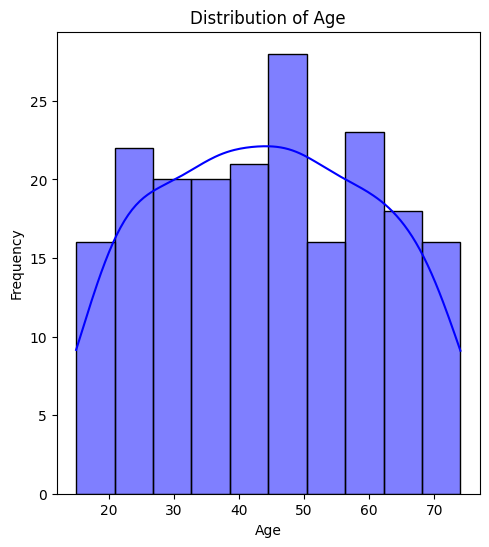

In [ ]:
mean_a= df['Age'].mean()
median_a= df['Age'].median()
mode_a = df['Age'].mode()[0]
print(f"Mean age: {mean_a}")
print(f"Median age: {median_a}")
print(f"Mode age: {mode_a}")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde = True, bins = 10, color= 'blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Distribution of Sex

<ipython-input-25-71ed9fda9863>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='bright')


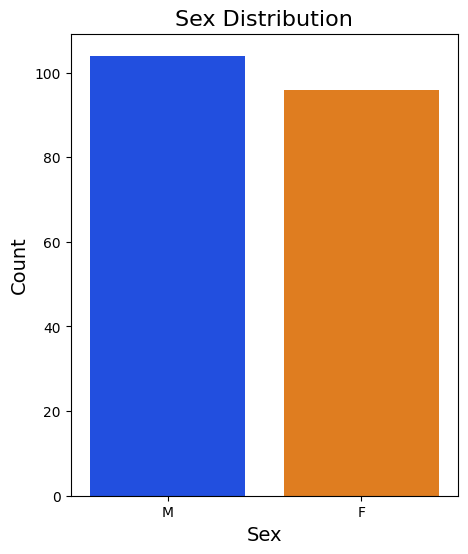

In [ ]:
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(5, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='bright')
plt.title('Sex Distribution', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Comparing Drug prescriptions by Sex

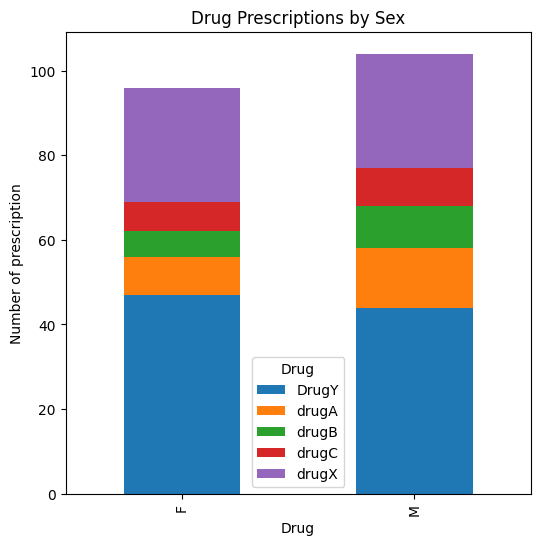

In [ ]:
prescription_counts = df.groupby(['Sex','Drug']).size().unstack()
prescription_counts.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Drug Prescriptions by Sex')
plt.xlabel('Drug')
plt.ylabel('Number of prescription')
plt.show()

Relationship between bp and drug

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64


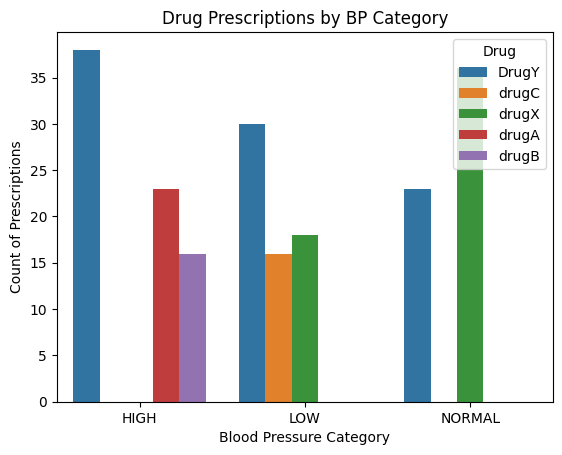

In [ ]:
bp_counts = df['BP'].value_counts()
print(bp_counts)
sns.countplot(x='BP', hue='Drug', data=df)
plt.title('Drug Prescriptions by BP Category')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count of Prescriptions')
plt.legend(title='Drug')
plt.show()

Cholesterol level distribution by drug

In [4]:
chol_counts = df['Cholesterol'].value_counts()
print(chol_counts)

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64


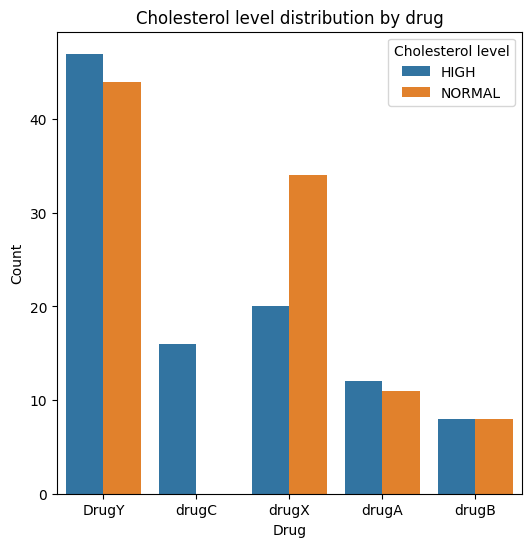

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Drug', hue='Cholesterol')
plt.title('Cholesterol level distribution by drug')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Cholesterol level')
plt.show()

Na_to_k distribution for each drug

In [12]:
drug_distribution = df.groupby(['Na_to_K', 'Drug']).size().unstack().fillna(0)
print(drug_distribution)


Drug     DrugY  drugA  drugB  drugC  drugX
Na_to_K                                   
6.269      0.0    1.0    0.0    0.0    0.0
6.683      0.0    0.0    0.0    0.0    1.0
6.769      0.0    0.0    0.0    1.0    0.0
7.261      0.0    0.0    0.0    0.0    1.0
7.285      0.0    0.0    0.0    0.0    1.0
...        ...    ...    ...    ...    ...
34.686     1.0    0.0    0.0    0.0    0.0
34.997     1.0    0.0    0.0    0.0    0.0
35.639     1.0    0.0    0.0    0.0    0.0
37.188     1.0    0.0    0.0    0.0    0.0
38.247     1.0    0.0    0.0    0.0    0.0

[198 rows x 5 columns]


In [13]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(drug_distribution)
print(f"Chi-square value: {chi2}, p-value: {p}")

Chi-square value: 791.8981481481479, p-value: 0.4542944181568754


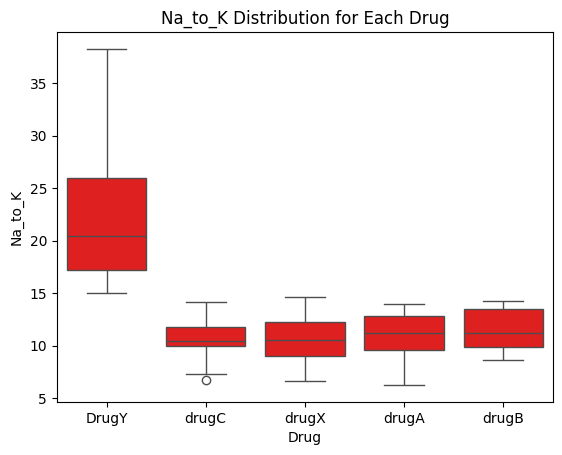

In [15]:
sns.boxplot(data=df, x='Drug', y='Na_to_K', color='red')
plt.title('Na_to_K Distribution for Each Drug')
plt.show()

Drug Distribution by Age group

<ipython-input-25-43affdcc8415>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_drug_dist = df.groupby(['Age_Group', 'Drug']).size().reset_index(name='Count')


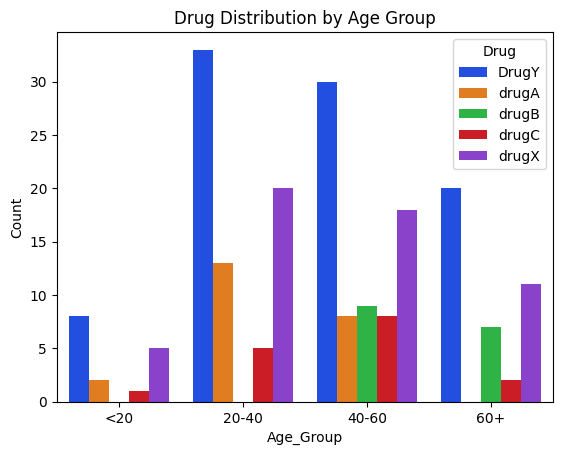

In [25]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 100], labels=['<20', '20-40', '40-60', '60+'])
age_drug_dist = df.groupby(['Age_Group', 'Drug']).size().reset_index(name='Count')

# Plot a bar chart
sns.barplot(data=age_drug_dist, x='Age_Group', y='Count', hue='Drug',  palette=sns.color_palette("bright", 5))
plt.title('Drug Distribution by Age Group')
plt.show()

Correlation of age and Na_to_K

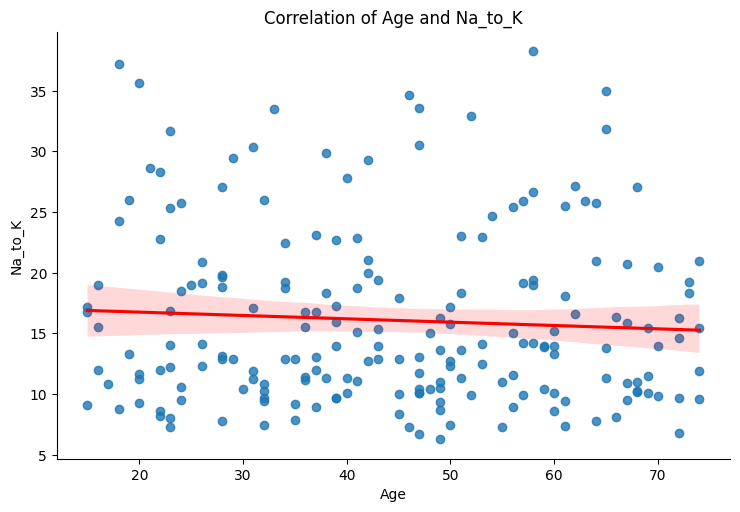

In [33]:
correlation=df['Age'].corr(df['Na_to_K'])
sns.lmplot(x='Age', y='Na_to_K',data=df, height=5, aspect=1.5, line_kws={'color':'red'})
plt.title('Correlation of Age and Na_to_K')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.show()